## Task 1

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line, scale_x_continuous, scale_y_continuous, scale_size_continuous, scale_fill_manual, theme, theme_bw, element_text, labs, annotate, guides, guide_legend, element_blank
import warnings # To suppress warnings
warnings.filterwarnings("ignore")

In [2]:
# Import and read dataset
df1 = pd.read_csv("q1data.csv")

# Ignore missing values for income, life_exp, population, four_regions
df1 = df1.dropna(subset = ["income", "life_exp", "population", "four_regions"])
df1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


Main aesthetics used in this gapminder visualization are:
- x axis: Income
- y axis: Life Expectancy
- color: four_regions
- size: population

In [3]:
# Creating a dictionary to specify color (using hex code) for regions
color_dict = {
    "americas": "#99ff33",
    "africa":   "#33ffff",
    "asia":     "#ff0066",   
    "europe":   "#ffff1a"    
}

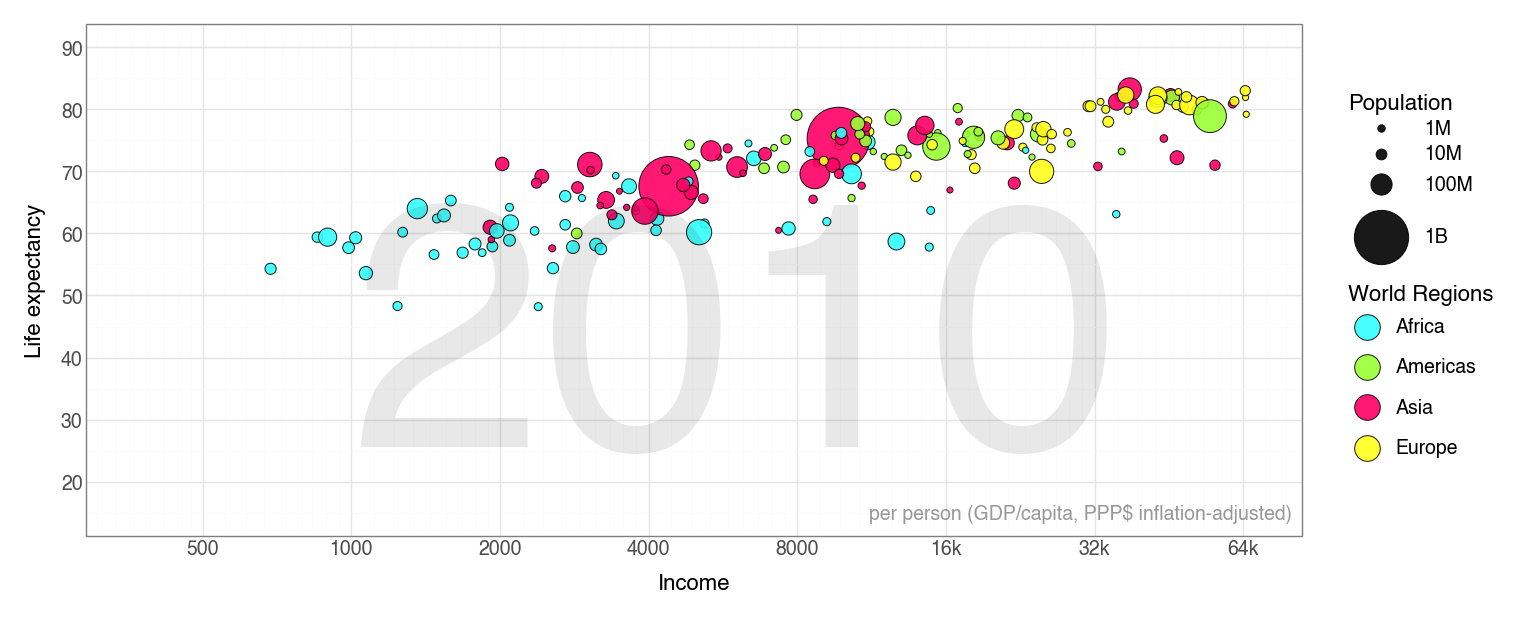

In [4]:
# Define xticks
xticks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]
xlabels = ['500', '1000', '2000', '4000', '8000', '16k', '32k', '64k']

plot = (
    ggplot(df1, aes(x = "income", y = "life_exp", size = "population", fill = "four_regions"))
    + geom_point(alpha = 0.9, color = "black", stroke = 0.4) # bubble outline color and thickness
    + scale_x_continuous(trans = "log10", limits = (375, 65000), breaks = xticks, labels = xlabels)
    + scale_y_continuous(limits = (15, 90), breaks = list(range(20, 91, 10)))
    + scale_size_continuous(range = (2, 25), breaks = [1e6, 1e7, 1e8, 1e9], labels = ["1M", "10M", "100M", "1B"])  # bubble size scaling, size labels for legend
    + scale_fill_manual(values = color_dict, labels = ["Africa", "Americas", "Asia", "Europe"]) # bubble color and custom labels
    + guides(fill = guide_legend(override_aes = {"shape": "o", "size": 10})) # legend for bubble colors
    + labs(
        x = "Income",
        y = "Life expectancy",
        fill = "World Regions",
        size = "Population"
        )
    + annotate("text", x = 6000, y = 40, label = "2010", size = 250, alpha = 0.09)  # year 2010 text
    + annotate("text", x = 30000, y = 15, label = "per person (GDP/capita, PPP$ inflation-adjusted)", size = 14, alpha = 0.4)  # text for years
    + theme_bw() # white background
    + theme(figure_size = (15, 6), 
            axis_title_x = element_text(size = 16),   # x-axis label font
            axis_title_y = element_text(size = 16),   # y-axis label font
            axis_text_x = element_text(size = 14),    # x tick labels
            axis_text_y = element_text(size = 14),    # y tick labels
            legend_title = element_text(size = 16),   # legend title
            legend_text = element_text(size = 14),    # legend labels
            axis_ticks_major_x=element_blank(),       # remove x ticks
            axis_ticks_major_y=element_blank()        # remove y ticks
))

plot

An alternative approach for data visualization

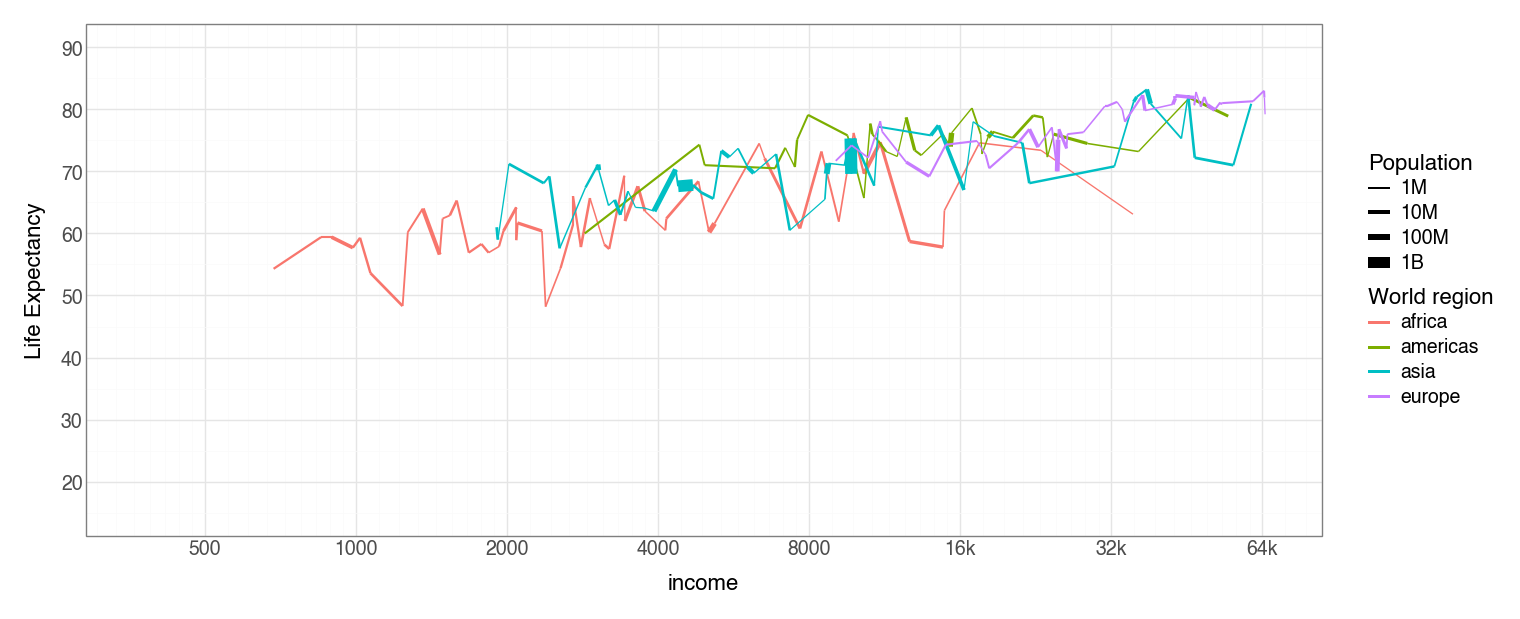

In [5]:
plot = (
    ggplot(df1, aes(x="income", y="life_exp", color="four_regions", size="population"))
    + geom_line()
    + scale_x_continuous(trans = "log10", limits = (375, 65000), breaks = xticks, labels = xlabels)
    + scale_y_continuous(limits = (15, 90), breaks = list(range(20, 91, 10)))
    + scale_size_continuous(range = (0.5, 5), breaks = [1e6, 1e7, 1e8, 1e9], labels = ["1M", "10M", "100M", "1B"]) +
    labs(
        x="income",
        y="Life Expectancy",
        color="World region",
        size = "Population"
    ) +
    theme_bw() # white background
    + theme(figure_size = (15, 6), 
    axis_title_x = element_text(size = 16),   # x-axis label font
            axis_title_y = element_text(size = 16),   # y-axis label font
            axis_text_x = element_text(size = 14),    # x tick labels
            axis_text_y = element_text(size = 14),    # y tick labels
            legend_title = element_text(size = 16),   # legend title
            legend_text = element_text(size = 14),    # legend labels
            axis_ticks_major_x=element_blank(),       # remove x ticks
            axis_ticks_major_y=element_blank()        # remove y ticks
))

plot

`geom_line` is a good choice for visualizing q1dataset because it shows a clear trend between the two continuous variables income and life expectancy grouped by regions. The line thickness shows the population, but with too many categorical variables i.e. regions, the lines overlap and the chart gets messy so it becomes harder to see individual regions clearly than the bubble plot.

## Task 2

In [6]:
# Import libraries
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, scale_x_continuous, scale_y_continuous, scale_size_continuous, scale_fill_manual, theme, theme_bw, element_text, labs, annotate, guides, guide_legend, element_blank

In [7]:
# Import dataset
df2 = pd.read_csv("q2data.csv")

# Ignore missing values for exports, imports, energy, four_regions
df2 = df2.dropna(subset = ["exports", "imports", "energy", "four_regions"])
df2.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
1,36.7,11.5,427.0,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825.0,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
6,12.9,10.4,1660.0,1997,Argentina,americas,america,america_south,Latin America & Caribbean
7,52.8,19.0,610.0,1997,Armenia,europe,europe_central_asia,europe_east,Europe & Central Asia
9,20.5,19.6,5550.0,1997,Australia,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific


Main aesthetics used in this gapminder visualization are :
- x axis: Exports (% of GDP)
- y axis: Import (% of GDP)
- color: four_regions
- size: Energy

In [8]:
# Creating a dictionary to specify color (using hex code) for regions
color_dict = {
    "americas": "#99ff33",
    "africa":   "#33ffff",
    "asia":     "#ff0066",   
    "europe":   "#ffff1a"    
}

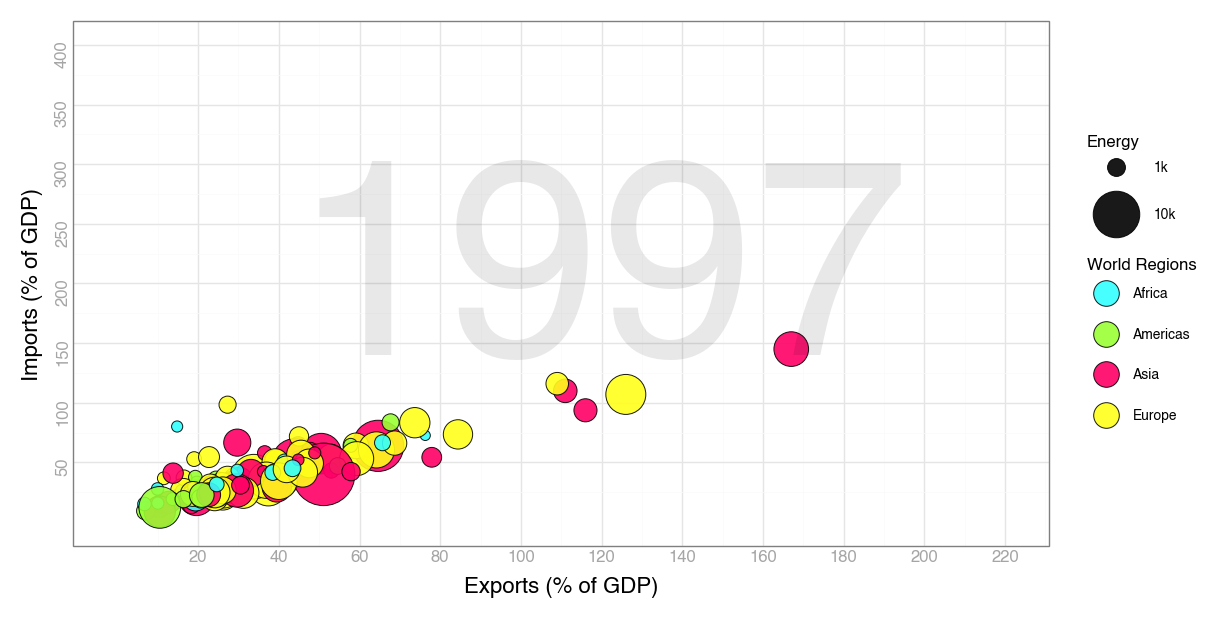

In [9]:
plot = (
    ggplot(df2, aes(x = "exports", y = "imports", size = "energy", fill = "four_regions"))
    + geom_point(alpha = 0.9, color = "black", stroke = 0.4) # bubble outline color and thickness
    + scale_x_continuous(limits = (0, 220), breaks = list(range(20, 230, 20)))
    + scale_y_continuous(limits = (0, 400), breaks = list(range(50, 410, 50)))
    + scale_size_continuous(range = (2, 25), breaks = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5], labels = ["1", "10", "100", "1k", "10k", "100k"])  # bubble size scaling, size labels for legend
    + scale_fill_manual(values = color_dict, labels = ["Africa", "Americas", "Asia", "Europe"]) # bubble color and custom labels
    + guides(fill = guide_legend(override_aes = {"shape": "o", "size": 10})) # legend for bubble colors
    + labs(
        x = "Exports (% of GDP)",
        y = "Imports (% of GDP)",
        fill = "World Regions",
        size = "Energy"
        )
    + annotate("text", x = 120, y = 200, label = "1997", size = 200, alpha = 0.09)  # year 1997 text
    + theme_bw() # white background
    + theme(figure_size = (12, 6), 
            axis_title_x = element_text(size = 16),   # x-axis label font
            axis_title_y = element_text(size = 16),   # y-axis label font
            axis_text_x = element_text(size = 12, alpha = 0.5),    # x tick labels
            axis_text_y = element_text(size = 12, angle=90, alpha = 0.5),    # y tick labels
            legend_title = element_text(size = 12),   # legend title
            legend_text = element_text(size = 10),     # legend labels
            axis_ticks_major_x=element_blank(),   # remove x ticks
            axis_ticks_major_y=element_blank()    # remove y ticks
))

plot

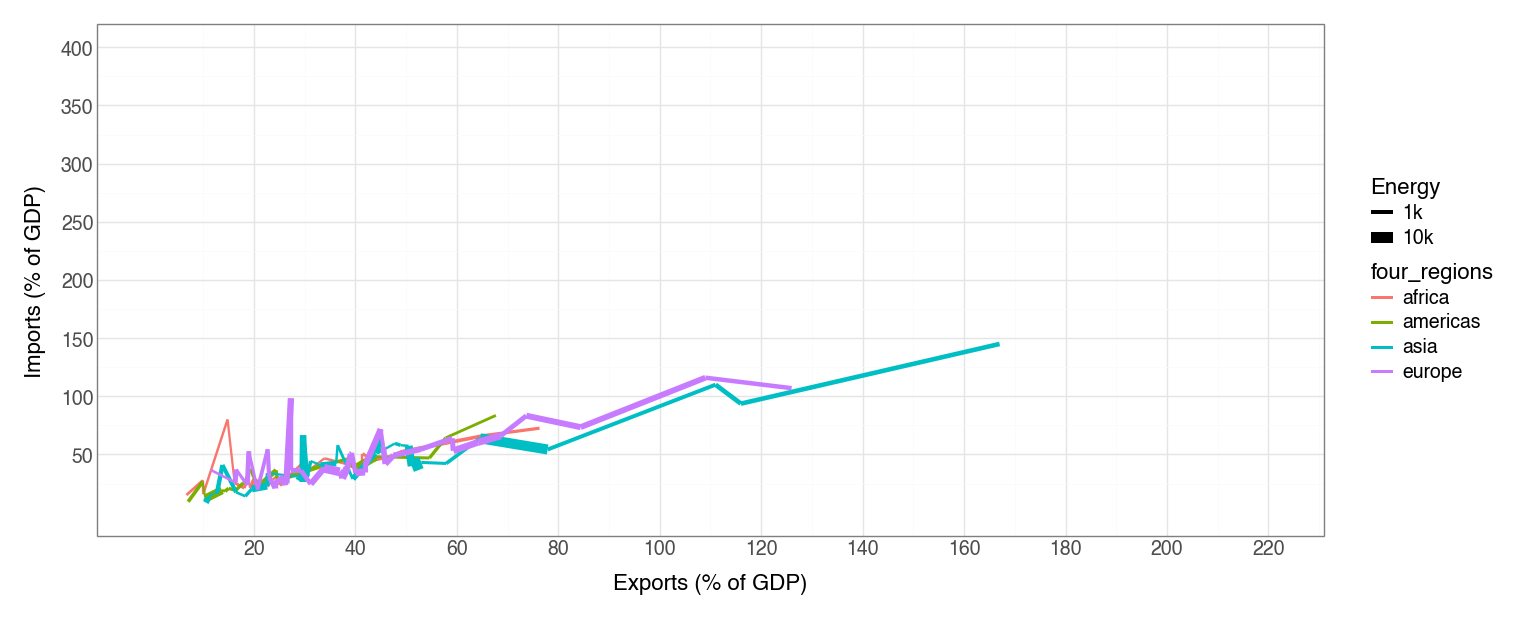

In [10]:
plot = (
    ggplot(df2, aes(x="exports", y="imports", color="four_regions", size="energy"))
    +  geom_line()
    + scale_x_continuous(limits = (0, 220), breaks = list(range(20, 230, 20)))
    + scale_y_continuous(limits = (0, 400), breaks = list(range(50, 410, 50)))
    + scale_size_continuous(range = (0.5, 5), breaks = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5], labels = ["1", "10", "100", "1k", "10k", "100k"])
    + scale_fill_manual(values = color_dict, labels = ["Africa", "Americas", "Asia", "Europe"])
    + labs(
        x = "Exports (% of GDP)",
        y = "Imports (% of GDP)",
        fill = "World Regions",
        size = "Energy"
    ) +
    theme_bw() # white background
    + theme(figure_size = (15, 6), 
    axis_title_x = element_text(size = 16),   # x-axis label font
            axis_title_y = element_text(size = 16),   # y-axis label font
            axis_text_x = element_text(size = 14),    # x tick labels
            axis_text_y = element_text(size = 14),    # y tick labels
            legend_title = element_text(size = 16),   # legend title
            legend_text = element_text(size = 14),    # legend labels
            axis_ticks_major_x=element_blank(),       # remove x ticks
            axis_ticks_major_y=element_blank()        # remove y ticks
))

plot

`geom_line` is a good alternative for visualizing q2dataset because it shows a clear trend movement between the two continuous variables exports and imports grouped by regions. The line thickness shows the energy usage, but with too many categorical variables i.e. regions, the lines overlap and the chart gets messy so it becomes harder to see individual regions clearly than the bubble plot.

## Task 3

In [11]:
# Import dataset
df3 = pd.read_csv("q3data.csv")

# Ignore missing values for internet_users, gdp, income, four_regions
df3 = df3.dropna(subset = ["internet_users", "gdp", "income", "four_regions"])
df3.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
5,0.27000,2440.0,2900.0,2001,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


Main aesthetics used in this gapminder visualization are :
- x axis = internet_users
- y axis = gdp
- color =  four_regions
- size = income

In [12]:
# Creating a dictionary to specify color (using hex code) for regions
color_dict = {
    "americas": "#99ff33",
    "africa":   "#33ffff",
    "asia":     "#ff0066",   
    "europe":   "#ffff1a"    
}

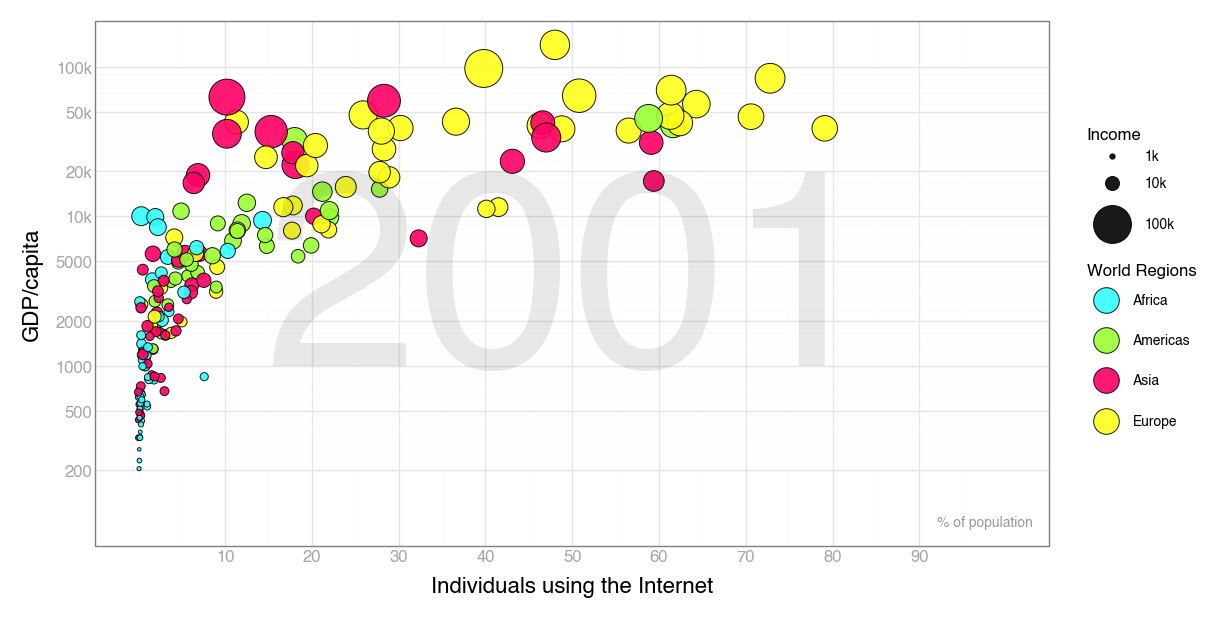

In [13]:
# Define yticks
yticks = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
ylabels = ['200', '500', '1000', '2000', '5000', '10k', '20k', '50k', '100k']

# Define xticks
xticks = list(range(10, 100, 10))
xlabels = ['10', '20', '30', '40', '50', '60', '70', '80', '90']

plot = (
    ggplot(df3, aes(x = "internet_users", y = "gdp", size = "income", fill = "four_regions"))
    + geom_point(alpha = 0.9, color = "black", stroke = 0.4) # bubble outline color and thickness
    + scale_x_continuous(limits = (0, 100), breaks = xticks, labels = xlabels)
    + scale_y_continuous(trans = "log10", breaks = yticks, labels = ylabels)
    + scale_size_continuous(range = (1, 15), breaks = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5], labels = ["1", "10", "100", "1k", "10k", "100k"])  # bubble size scaling, size labels for legend
    + scale_fill_manual(values = color_dict, labels = ["Africa", "Americas", "Asia", "Europe"]) # bubble color and custom labels
    + guides(fill = guide_legend(override_aes = {"shape": "o", "size": 10})) # legend for bubble colors
    + labs(
        x = "Individuals using the Internet",
        y = "GDP/capita",
        fill = "World Regions",
        size = "Income"
        )
    + annotate("text", x = 50, y = 3000, label = "2001", size = 200, alpha = 0.09)  # year 2001 text
    + annotate("text", x = 92, y = 90, label = "% of population", size = 10, alpha = 0.4, ha="left")  # text for years
    + theme_bw() # white background
    + theme(figure_size = (12, 6), 
    axis_title_x = element_text(size = 16),   # x-axis label font
    axis_title_y = element_text(size = 16),   # y-axis label font
    axis_text_x = element_text(size = 12, alpha = 0.5),    # x tick labels
    axis_text_y = element_text(size = 12, alpha = 0.5),    # y tick labels
    legend_title = element_text(size = 12),   # legend title
    legend_text = element_text(size = 10),     # legend labels
    axis_ticks_major_x=element_blank(),   # remove x ticks
    axis_ticks_major_y=element_blank()    # remove y ticks
))

plot

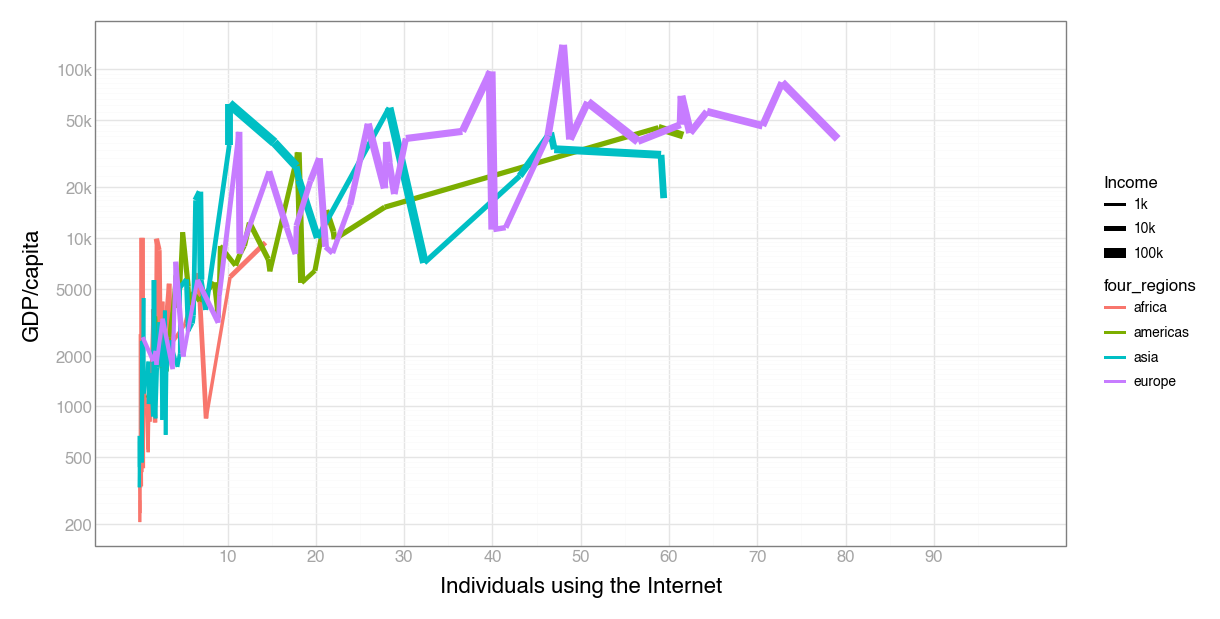

In [14]:
plot = (
    ggplot(df3, aes(x = "internet_users", y = "gdp", size = "income", color = "four_regions"))
    + geom_line()
    + scale_x_continuous(limits = (0, 100), breaks = xticks, labels = xlabels)
    + scale_y_continuous(trans = "log10", breaks = yticks, labels = ylabels)
    + scale_size_continuous(range = (1, 4), breaks = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5], labels = ["1", "10", "100", "1k", "10k", "100k"])  
    + scale_fill_manual(values = color_dict, labels = ["Africa", "Americas", "Asia", "Europe"])
    + labs(
        x = "Individuals using the Internet",
        y = "GDP/capita",
        fill = "World Regions",
        size = "Income"
        )
    + theme_bw() # white background
    + theme(figure_size = (12, 6), 
    axis_title_x = element_text(size = 16),   # x-axis label font
    axis_title_y = element_text(size = 16),   # y-axis label font
    axis_text_x = element_text(size = 12, alpha = 0.5),    # x tick labels
    axis_text_y = element_text(size = 12, alpha = 0.5),    # y tick labels
    legend_title = element_text(size = 12),   # legend title
    legend_text = element_text(size = 10),     # legend labels
    axis_ticks_major_x=element_blank(),   # remove x ticks
    axis_ticks_major_y=element_blank()    # remove y ticks
))

plot

`geom_line` is a good choice for visualizing q3dataset because it shows a trend between the two continuous variables internet usage and gdp/capita grouped by regions. The line thickness shows the income, but with too many categorical variables i.e. regions, the lines overlap and the chart gets messy so it becomes harder to see individual regions clearly than the bubble plot.